In [1]:
pip install tensorflow


In [3]:
pip install h5py



SyntaxError: invalid syntax (1606352900.py, line 1)

In [4]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D


from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

from numpy import argmax
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


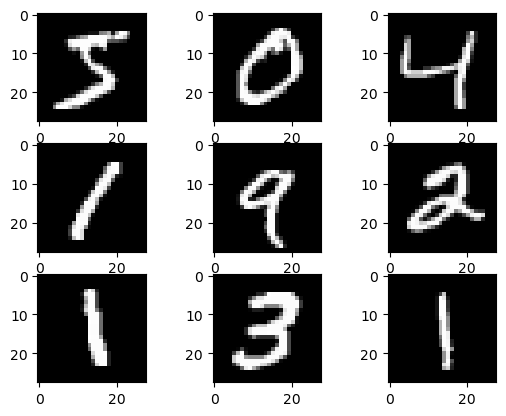

In [18]:
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [19]:
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [15]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [20]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [17]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_split = 0.2, verbose=0)
        
        model.save('final_model.h5')
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('Accuracy> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
        
    test_predictions = np.argmax(model.predict(testX),axis=1) #model.predict_classes(testX)
    testY = np.argmax(testY, axis=1)
    #test_predictions = to_categorical(test_predictions)
    #print('testY is', testY)
    print('/n/nPrediction on test data is:', test_predictions)
    
    cm = confusion_matrix(y_true = testY, y_pred = test_predictions)

    print('\n\n\nConfusion Matrix is: \n', cm)
    
    print('\n\n\nClassification Report is: \n', classification_report(testY, test_predictions))
    return scores, histories

In [12]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
        plt.figure(figsize =(25, 10))
        plt.title('Cross Entropy Loss')
        plt.xlabel('epoch')
        plt.plot(histories[4].history['loss'], color='blue', linestyle ='solid', marker ='o',
         markerfacecolor ='red', markersize = 6, label='train')
        plt.plot(histories[4].history['val_loss'], color='orange', linestyle ='solid', marker = 'o',
         markerfacecolor ='red', markersize = 6, label='test')
        plt.legend(labels = ['Training error','Validation error'])
        plt.show()
        
        plt.figure(figsize =(25, 10))
        plt.title('Classification Accuracy')
        plt.xlabel('epoch')
        plt.plot(histories[4].history['accuracy'], color='blue', linestyle ='solid', marker ='o',
         markerfacecolor ='red', markersize = 6, label='train')
        plt.plot(histories[4].history['val_accuracy'], color='orange', linestyle ='solid', marker = 'o',
         markerfacecolor ='red', markersize = 6, label='test')
        plt.legend(labels = ['Training Accuracy', 'Validation Accuracy'])
        plt.show()

In [13]:
# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()

In [16]:
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # evaluate model
    scores, histories = evaluate_model(trainX, trainY)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)

In [ ]:
# entry point, run the test harness
run_test_harness()

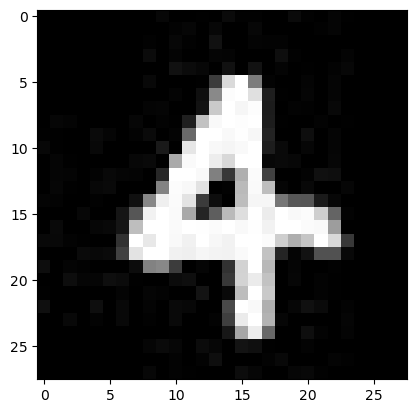

1/1 [==============================] - 0s 118ms/step
Output Generated...
Output of the above test example is: 4


In [22]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img
 
# load an image and predict the class
def run_example():
    # load the image
    filename = 'sample_image_4.png'
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    # show the figure
    plt.show()
    
    
    img = load_image(filename)
    # load model
    model = load_model('final_model.h5')
    # predict the class
    predict_value = model.predict(img)
    digit = argmax(predict_value)
    print('Output Generated...')
    print('Output of the above test example is:',digit)

# entry point, run the example
run_example()

In [23]:
pip install opencv-python


In [ ]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
import os
import cv2
from PIL import ImageGrab, Image
import numpy as np

model = load_model('final_model.h5')

print('Trained weights loaded')

def get_handle():
    """This function uses the wingui library to get the window handles of all the active windows. 
    Then, the window with the name as 'tk' is selected and its handle is returned."""
    toplist = []
    windows_list = []
    canvas = 0
    def enum_win(hwnd, result):
        win_text = win32gui.GetWindowText(hwnd)
        #print(hwnd, win_text)
        windows_list.append((hwnd, win_text))
    win32gui.EnumWindows(enum_win, toplist)
    for (hwnd, win_text) in windows_list:
        if 'tk' == win_text:
            canvas = hwnd
    return canvas

def preprocessing_image():
    """function to preprocess the image to"""
    image = cv2.imread('test.jpg')
    #print(type(image))
    grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
    
    # cv2.imshow('binarized image', thresh)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # print(type(contours[0]))
    # print(len(contours[0]))
    cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 
    #cv2.imshow('Contours', image) 
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)        
        # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
        cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
        # Cropping out the digit from the image corresponding to the current contours in the for loop
        digit = thresh[y:y+h, x:x+w]        
        # Resizing that digit to (18, 18)
        resized_digit = cv2.resize(digit, (18,18))        
        # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)        
        # Adding the preprocessed digit to the list of preprocessed digits
        preprocessed_digit = (padded_digit)
    return preprocessed_digit

def predict_digit(img):
    """function to predict the digit. 
    Argument of function is PIL Image"""
    img.save('test.jpg')
    preprocessed_image = preprocessing_image()
    # print(type(preprocessed_image))
    # print(preprocessed_image.shape)
    img = preprocessed_image.reshape(1, 28, 28, 1)
    img = img/255.0
    #predicting the digit
    result = model.predict([img])[0]
    os.remove('test.jpg')
    return np.argmax(result), max(result)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command = self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
    def clear_all(self):
        self.canvas.delete("all")
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        hwnd = get_handle()
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        x1, y1, x2, y2 = rect
        # print(x1,x2, y1,y2)
        im = ImageGrab.grab((x1+40, y1+40, x2+100, y2+100))
        digit, acc = predict_digit(im)
        print(digit)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

app = App()
mainloop()

Trained weights loaded
1/1 [==============================] - 0s 161ms/step
1
1/1 [==============================] - 0s 54ms/step
2
1/1 [==============================] - 0s 59ms/step
2
1/1 [==============================] - 0s 49ms/step
3
1/1 [==============================] - 0s 53ms/step
4
1/1 [==============================] - 0s 71ms/step
5
1/1 [==============================] - 0s 47ms/step
8
1/1 [==============================] - 0s 56ms/step
8
1/1 [==============================] - 0s 53ms/step
8
1/1 [==============================] - 0s 59ms/step
8
1/1 [==============================] - 0s 61ms/step
8
1/1 [==============================] - 0s 47ms/step
8
1/1 [==============================] - 0s 57ms/step
8
1/1 [==============================] - 0s 50ms/step
8
1/1 [==============================] - 0s 48ms/step
8
1/1 [==============================] - 0s 54ms/step
8
1/1 [==============================] - 0s 54ms/step
8
1/1 [==============================] - 0s 63ms/step
8
1/1 